In [1]:
SPX_1M = "../data_manual/SPX_1m.csv"

In [2]:
import polars as pl
spx = pl.read_csv(SPX_1M)
ts_col = spx.columns[0]
spx = spx.with_columns(pl.col(ts_col)
      .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
      .alias("date")).drop(ts_col)
names = ["open","high","low","close","change"]
mapping = {spx.columns[i]: names[i] for i in range(len(names))}
spx = spx.rename(mapping)
spx = spx.select(["date"] + names).sort("date")
spx = spx.filter(pl.col("date").is_not_null())
spx

date,open,high,low,close,change
datetime[μs],f64,f64,f64,f64,f64
2025-03-03 09:30:00,5968.33,5972.39,5967.38,5968.67,0.0
2025-03-03 09:31:00,5969.04,5976.85,5968.94,5976.85,8.18
2025-03-03 09:32:00,5977.58,5983.49,5977.58,5982.61,5.76
2025-03-03 09:33:00,5982.98,5986.09,5978.87,5979.04,-3.57
2025-03-03 09:34:00,5979.03,5982.73,5978.59,5979.67,0.63
…,…,…,…,…,…
2025-03-14 16:17:00,5638.94,5638.94,5638.94,5638.94,0.0
2025-03-14 16:18:00,5638.94,5638.94,5638.94,5638.94,0.0
2025-03-14 16:19:00,5638.94,5638.94,5638.94,5638.94,0.0


In [3]:
import pandas as pd
spx_df = pd.read_csv(SPX_1M)
spx_df['Date Time'] = pd.to_datetime(spx_df['Date Time'], errors='coerce')
spx_df = spx_df.rename(columns={'Date Time': 'date'})
spx_df = spx_df.set_index('date')
spx_df


,Open,High,Low,Close,Change
date,,,,,
2025-03-03 09:30:00,5968.33,5972.39,5967.38,5968.67,0.00
2025-03-03 09:31:00,5969.04,5976.85,5968.94,5976.85,8.18
2025-03-03 09:32:00,5977.58,5983.49,5977.58,5982.61,5.76
2025-03-03 09:33:00,5982.98,5986.09,5978.87,5979.04,-3.57
2025-03-03 09:34:00,5979.03,5982.73,5978.59,5979.67,0.63
...,...,...,...,...,...
2025-03-14 16:18:00,5638.94,5638.94,5638.94,5638.94,0.00
2025-03-14 16:19:00,5638.94,5638.94,5638.94,5638.94,0.00
2025-03-14 16:20:00,5638.94,5638.94,5638.94,5638.94,0.00


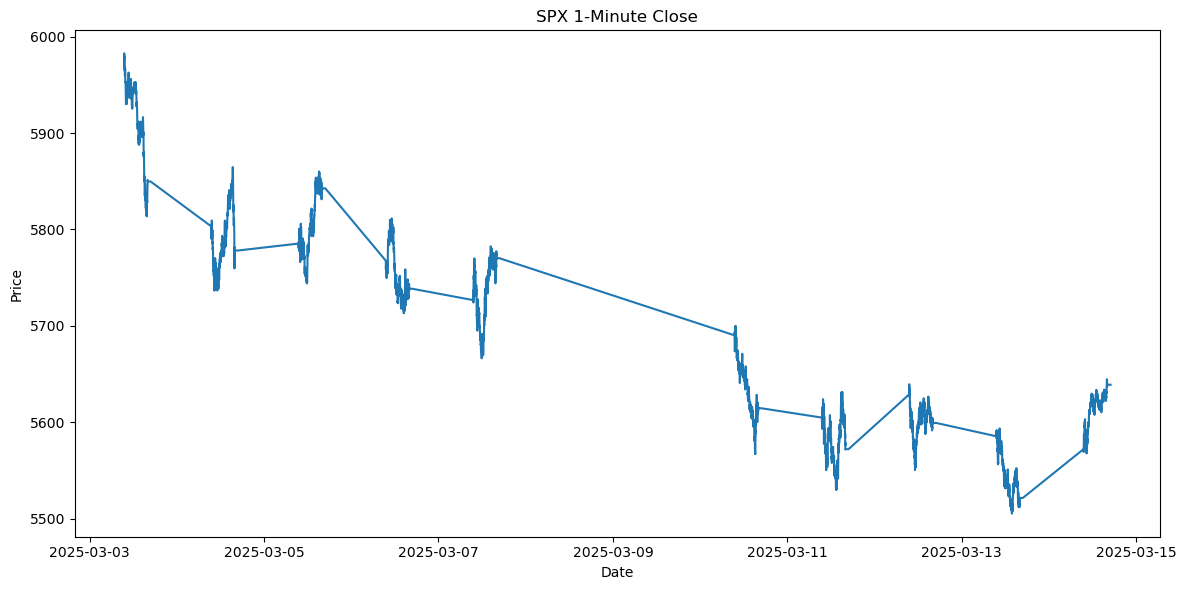

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(x=spx_df.index, y='Close', data=spx_df)
plt.title('SPX 1-Minute Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
